#  Analyse de données des systèmes éducatifs

In [1]:
# Importation des packages nécéssaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importation des données csv (également possible avec l'URL directement!)
full_set = pd.read_csv(r"C:\Users\Gregoire\Desktop\Projet 2 - Analyse système éducatif\Data\EdStatsData.csv")

In [3]:
full_set.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Format du jeu de données
full_set.shape   # on constate qu'il y a 4 variables indiquant le pays, et l'indicateur, 
                 # puis 66 pour les données, triées par date. 

(886930, 70)

In [5]:
# Type des données
full_set.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [6]:
# Données manquantes - analyse globale
full_set.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

Il y a énormément de données manquantes sur les premières années, ainsi que sur les projections lointaines (836000/887000 soit 94% de NaN). Voyons maintenant sur les années plus proches du présent.

In [7]:
# Données manquantes - analyse pertinente pour notre problème (analyse des données contémporaine)
full_set.iloc[:,[0,1,2,3,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54]].isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822
2006              746618
2007              749658
2008              752543
2009              744822
2010              644488
2011              740918
2012              739666
2013              749421
2014              773141
2015              755872
2016              870470
2017              886787
2020              835494
2030              835494
dtype: int64

A première vue le set semble très vide. Cela affecte évidement les années que nous allons sélectionner. 2010 est un bon choix (ou du moins semble être le plus complet) pour mesurer le passé proche, puis 2015. Cependant cette dernière année est relativement proche de 2010 et loin de nous. Il va donc être intéressant de sélectionner nos pays et variables d'intérêt afin de voir si ceux-ci sont particulièrement affectés suivant les années, ou au contraire le sont moins.

In [8]:
# Premier tri par date (feature selection - dimension reduction )
date_set = full_set.iloc[:,[0,1,2,3,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54]]

In [9]:
# Sélection de variables pertinentes (feature selection)
series = ['Enrolment in lower secondary general, both sexes (number)',
          'Enrolment in upper secondary general, both sexes (number)',
          'Enrolment in post-secondary non-tertiary education, both sexes (number)',
          'Enrolment in tertiary education, all programmes, both sexes (number)',
          'Government expenditure on education as % of GDP (%)',
         #'Proportion of youth and adults who have connected and installed new devices (%)', serie seems to not exist in the dataset, although it's present on the website
          'Internet users (per 100 people)',
          'GDP per capita (constant 2005 US$)'
         ]

In [10]:
# Filtrage des variables pertinentes (feature selection)
variable_date_set = date_set.loc[date_set['Indicator Name'].isin(series), :]

In [11]:
variable_date_set.shape

(1694, 23)

In [12]:
variable_date_set.head(24)

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,2030
1167,Arab World,ARB,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,1.470408e+07,1.526090e+07,1.613237e+07,1.654098e+07,1.687249e+07,1.710687e+07,...,1.897719e+07,1.918379e+07,1.919670e+07,1.865465e+07,1.843302e+07,NaN,NaN,NaN,NaN,NaN
1171,Arab World,ARB,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.588534e+05,2.924517e+05,3.078271e+05,3.280537e+05,3.298052e+05,3.138178e+05,...,2.485272e+05,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,NaN,NaN,NaN,NaN
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,6.899156e+06,7.214648e+06,...,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,NaN,NaN,NaN,NaN
1220,Arab World,ARB,"Enrolment in upper secondary general, both sex...",UIS.E.3.GPV,6.083158e+06,6.313384e+06,7.004977e+06,7.493570e+06,7.748103e+06,7.991074e+06,...,8.506002e+06,9.190047e+06,9.568954e+06,9.550892e+06,9.621427e+06,NaN,NaN,NaN,NaN,NaN
1244,Arab World,ARB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,3.344289e+03,3.331486e+03,3.429226e+03,3.658931e+03,3.796022e+03,3.975785e+03,...,4.358549e+03,4.409799e+03,4.588350e+03,4.648601e+03,NaN,NaN,NaN,NaN,NaN,NaN
1260,Arab World,ARB,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,1.561288e+00,2.693061e+00,3.645881e+00,7.006812e+00,8.393142e+00,1.165465e+01,...,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,NaN,NaN,NaN
4832,East Asia & Pacific,EAS,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,9.745917e+07,1.010972e+08,1.040495e+08,1.041600e+08,1.022080e+08,9.990093e+07,...,9.350424e+07,9.187510e+07,8.970302e+07,8.758526e+07,8.524068e+07,NaN,NaN,NaN,NaN,NaN
4836,East Asia & Pacific,EAS,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,1.692694e+06,1.838077e+06,1.774016e+06,1.773494e+06,1.698924e+06,1.589631e+06,...,1.919563e+06,1.847882e+06,1.735663e+06,2.779837e+06,3.231800e+06,NaN,NaN,NaN,NaN,NaN
4869,East Asia & Pacific,EAS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.780141e+07,3.120186e+07,3.475095e+07,3.818819e+07,4.118044e+07,4.421611e+07,...,5.523363e+07,5.658473e+07,5.887421e+07,6.091618e+07,6.909780e+07,NaN,NaN,NaN,NaN,NaN


In [13]:
# Valeurs manquantes sur notre set final
variable_date_set.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
2001               496
2002               474
2003               509
2004               480
2005               498
2006               522
2007               490
2008               477
2009               474
2010               484
2011               481
2012               490
2013               505
2014               612
2015              1077
2016              1252
2017              1694
2020              1694
2030              1694
dtype: int64

Il y a énormément de valeurs manquantes pour les dernières années (et même 100% sur les 3 dernières). On gardera certainement 2002, 2012 et 2016, à voir après le filtrage pays.

In [14]:
# Créations des listes pays à introduire
pays_ocde = [
            'Andorra', # present in the dataset
            'Austria', 
            'Australia', 
            'Belgium', 
            'Canada', 
            'Chile', 
            'Colombia', 
            'Costa Rica', 
            'Czech Republic', 
            'Denmark', 
            'Estonia', 
            'Finland', 
            'France', 
            'Germany', 
            'Greece', 
            'Hungary', 
            'Iceland', 
            'Ireland', 
            'Israel', 
            'Italy', 
            'Japan', 
            'Korea, Rep.', 
            'Latvia', 
            'Lithuania', 
            'Luxembourg', 
            'Mexico', 
            'Monaco', # present in the dataset
            'Netherlands', 
            'New Zealand', 
            'Norway', 
            'Poland', 
            'Portugal', 
            'Slovak Republic', 
            'Slovenia', 
            'Spain', 
            'Sweden', 
            'Switzerland', 
            'Turkey', 
            'United Kingdom',
            'United States'
           ]

In [15]:
# Autres pays
pays_ocde_devCenter = ['China',
                       'Argentina',
                       'India',
                       'South Africa',
                       'Brazil',
                       'Cabo Verde',
                       'Colombia',
                       'Cote d\'Ivoire',
                       'Egypt, Arab Rep.',
                       'El Salvador',
                       'Ghana',
                       'Guatemala',
                       'Mauritius',
                       'Indonesia',
                       'Kazakhstan',
                       'Morocco',
                       'Panama',
                       'Paraguay',
                       'Peru',
                       'Dominican Republic',
                       'Romania',
                       'Rwanda',
                       'Senegal',
                       'Thailand',
                       'Togo',
                       'Tunisia',
                       'Uruguay',
                       'Vietnam'
                      ]
len(pays_ocde_devCenter)

28

In [16]:
# Combinaison des deux sets
full_pays = pays_ocde + pays_ocde_devCenter
len(full_pays)

68

In [17]:
# Données après tri par date, variable et pays
pre_final_set = variable_date_set.loc[variable_date_set['Country Name'].isin(full_pays), :]

In [18]:
pre_final_set.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,2030
107452,Andorra,AND,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,NaN,2327.000000,2442.000000,2479.000000,2786.00000,2792.000000,...,2838.000000,2900.000000,3026.000000,3079.000000,3031.000000,NaN,NaN,NaN,NaN,NaN
107456,Andorra,AND,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,NaN,NaN,140.000000,...,1027.000000,NaN,NaN,180.000000,182.000000,NaN,NaN,NaN,NaN,NaN
107489,Andorra,AND,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,267.000000,306.000000,331.000000,342.00000,401.000000,...,NaN,NaN,491.000000,538.000000,498.000000,501.000000,NaN,NaN,NaN,NaN
107505,Andorra,AND,"Enrolment in upper secondary general, both sex...",UIS.E.3.GPV,NaN,590.000000,533.000000,549.000000,720.00000,805.000000,...,854.000000,889.000000,857.000000,842.000000,925.000000,NaN,NaN,NaN,NaN,NaN
107529,Andorra,AND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,41420.846178,42396.302398,45519.492384,47032.866888,48831.92936,49708.400489,...,39736.354063,38205.771089,38190.586585,39104.301849,40785.049228,41765.920353,42681.603824,NaN,NaN,NaN


In [19]:
pre_final_set.shape

(469, 23)

In [20]:
# Vérifications du bon filtrage de certains pays
pre_final_set.loc[pre_final_set['Country Code'] == 'KOR', :]

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,2030
470287,"Korea, Rep.",KOR,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,1.841964e+06,1.851685e+06,1.865290e+06,1.939546e+06,2.016872e+06,2.081544e+06,...,1.980847e+06,1.916669e+06,1.855160e+06,1.816273e+06,NaN,NaN,NaN,NaN,NaN,NaN
470291,"Korea, Rep.",KOR,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470324,"Korea, Rep.",KOR,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,3.129899e+06,3.210142e+06,3.223431e+06,3.224875e+06,3.210184e+06,3.204036e+06,...,3.269509e+06,3.356011e+06,3.359739e+06,3.342264e+06,3.318307e+06,3.268099e+06,NaN,NaN,NaN,NaN
470340,"Korea, Rep.",KOR,"Enrolment in upper secondary general, both sex...",UIS.E.3.GPV,1.269470e+06,1.229800e+06,1.233926e+06,1.238417e+06,1.266248e+06,1.288112e+06,...,1.503524e+06,1.534924e+06,1.552910e+06,1.566724e+06,NaN,NaN,NaN,NaN,NaN,NaN
470364,"Korea, Rep.",KOR,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1.566738e+04,1.673485e+04,1.713666e+04,1.790523e+04,1.856836e+04,1.942719e+04,...,2.208695e+04,2.272471e+04,2.312376e+04,2.368541e+04,2.432357e+04,2.487077e+04,25458.887009,NaN,NaN,NaN
470380,"Korea, Rep.",KOR,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.898370e+00,3.792310e+00,4.131980e+00,4.115440e+00,3.900510e+00,3.967650e+00,...,NaN,NaN,4.627540e+00,NaN,NaN,5.052110e+00,NaN,NaN,NaN,NaN
470495,"Korea, Rep.",KOR,Internet users (per 100 people),IT.NET.USER.P2,5.660000e+01,5.940000e+01,6.550000e+01,7.270000e+01,7.350000e+01,7.810000e+01,...,8.370000e+01,8.375912e+01,8.407000e+01,8.477000e+01,8.755683e+01,8.964863e+01,92.716545,NaN,NaN,NaN


In [21]:
# Vérification par comptage
(len(pays_ocde + pays_ocde_devCenter) * len(series)) - len(pre_final_set) # Calcul du nombre de pays manquants

7

In [22]:
# Quels sont les pays manquants?  
pd.Series(list(set(full_pays).intersection(set(pre_final_set['Country Name']))))

0              Senegal
1                 Togo
2               Norway
3            Indonesia
4       United Kingdom
            ...       
62          Kazakhstan
63      Czech Republic
64          Cabo Verde
65              Israel
66    Egypt, Arab Rep.
Length: 67, dtype: object

In [23]:
pd.Series(list(set(full_pays).symmetric_difference(set(pre_final_set['Country Name']))))

C:\Users\Gregoire\AppData\Local\Temp/ipykernel_7332/1505481467.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(list(set(full_pays).symmetric_difference(set(pre_final_set['Country Name']))))


Series([], dtype: float64)

'Egypt' est en réalité codée 'Egypt, Arab Rep.' dans le dataset de la Banque Mondiale. Brazil.. avec un Z et non un S!
Selon le résultat de la méthode 'symmetric_difference', tous les pays sont présents. Pourtant, il manque toujours 7 lignes selon notre calcul: Nb_pays * Nb_variables - Longueur_du_dataset_final

In [24]:
# Calcul du compte de variables
print(pre_final_set.groupby('Indicator Name').count().max())

Country Name      67
Country Code      67
Indicator Code    67
2001              66
2002              66
2003              66
2004              66
2005              67
2006              66
2007              67
2008              67
2009              67
2010              67
2011              67
2012              67
2013              67
2014              67
2015              67
2016              67
2017               0
2020               0
2030               0
dtype: int64


Nous trouvons au maximum 67 fois chaque indicateur, il manque donc bien un pays. Le dataset n'est pas trop long, nous allons vérifier "à la main".

In [25]:
# Comptage des pays à la main
chaque_pays = list(pre_final_set['Country Name'].drop_duplicates(keep='first')) # d'abord récupérer nos pays du set
chaque_pays.append('1')  # ajout d'une ligne à notre liste de pays récupérée via le set_final
print(chaque_pays)

['Andorra', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Cabo Verde', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Czech Republic', 'Denmark', 'Dominican Republic', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Latvia', 'Lithuania', 'Luxembourg', 'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Romania', 'Rwanda', 'Senegal', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Togo', 'Tunisia', 'Turkey', 'United Kingdom', 'United States', 'Uruguay', 'Vietnam', '1']


In [26]:
full_pays.sort()
comparaison_pays = pd.DataFrame(chaque_pays, full_pays)

In [27]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(comparaison_pays) # affiche l'intégralité du dataframe et non un output tronqué

                                     0
Andorra                        Andorra
Argentina                    Argentina
Australia                    Australia
Austria                        Austria
Belgium                        Belgium
Brazil                          Brazil
Cabo Verde                  Cabo Verde
Canada                          Canada
Chile                            Chile
China                            China
Colombia                      Colombia
Colombia                    Costa Rica
Costa Rica               Cote d'Ivoire
Cote d'Ivoire           Czech Republic
Czech Republic                 Denmark
Denmark             Dominican Republic
Dominican Republic    Egypt, Arab Rep.
Egypt, Arab Rep.           El Salvador
El Salvador                    Estonia
Estonia                        Finland
Finland                         France
France                         Germany
Germany                          Ghana
Ghana                           Greece
Greece                   

Aucun pays ne manquait, mais la Colombie était présente dans mes deux listes.

In [28]:
pays_ocde_devCenter = ['China',
                       'Argentina',
                       'India',
                       'South Africa',
                       'Brazil',
                       'Cabo Verde',
                      #'Colombia', entrée supprimée
                       'Cote d\'Ivoire',
                       'Egypt, Arab Rep.',
                       'El Salvador',
                       'Ghana',
                       'Guatemala',
                       'Mauritius',
                       'Indonesia',
                       'Kazakhstan',
                       'Morocco',
                       'Panama',
                       'Paraguay',
                       'Peru',
                       'Dominican Republic',
                       'Romania',
                       'Rwanda',
                       'Senegal',
                       'Thailand',
                       'Togo',
                       'Tunisia',
                       'Uruguay',
                       'Vietnam'
                      ]

In [29]:
# Re-création du pre_set_final
# Combinaison des deux sets
full_pays = pays_ocde + pays_ocde_devCenter

# Données après tri par date, variable et pays
pre_final_set = variable_date_set.loc[variable_date_set['Country Name'].isin(full_pays), :]

# Vérification par comptage
(len(pays_ocde + pays_ocde_devCenter) * len(series)) - len(pre_final_set) # Calcul du nombre de pays manquants

0

Tous les pays et variables sont bien là.
On va maintenant retraiter les NaN.

In [30]:
# Voyons de nouveau les NaN
pre_final_set.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
2001               67
2002               59
2003               80
2004               61
2005               69
2006               66
2007               58
2008               60
2009               66
2010               61
2011               60
2012               59
2013               59
2014              108
2015              266
2016              333
2017              469
2020              469
2030              469
dtype: int64

In [31]:
# Regardons le nombre de NaN par variable par année
pre_final_set[['Indicator Name', '2001', '2002', '2003', '2004', '2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].groupby('Indicator Name').count()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Indicator Name,,,,,,,,,,,,,,,,,
"Enrolment in lower secondary general, both sexes (number)",63,64,57,65,63,63,65,65,65,64,66,66,63,49,2,0,0
"Enrolment in post-secondary non-tertiary education, both sexes (number)",41,39,36,37,35,37,37,35,33,34,33,35,40,33,1,0,0
"Enrolment in tertiary education, all programmes, both sexes (number)",53,56,55,55,56,57,57,56,54,58,56,59,60,58,49,2,0
"Enrolment in upper secondary general, both sexes (number)",60,64,57,63,61,61,63,63,63,62,64,65,61,48,2,0,0
GDP per capita (constant 2005 US$),66,66,66,66,66,66,66,66,66,67,66,66,66,66,66,66,0
Government expenditure on education as % of GDP (%),53,55,52,56,52,53,56,57,55,56,57,52,53,40,16,1,0
Internet users (per 100 people),66,66,66,66,67,66,67,67,67,67,67,67,67,67,67,67,0


Sachant que nous avons 67 pays, les Indicateurs présentant un nombre minimal de 50-55 valeurs semble convenir pour être conservés.
Concernant nos variables les plus reliées à l'éducation, nous avons décidé de retenir le nombre d'élèves inscrits en établissement scolaire au lycée et au delà. Les indicateurs semblent contenir un nombre suffisant d'information pour notre sélection de pays, mis à part 'Enrolment in post-secondary non-tertiary education, both sexes (number)' que nous dropperont peut-être de l'analyse.

Vis à vis des années anciennes (décénnie 2000), toutes les années semblent correctement remplies et le choix se fera donc en fonction de l'écart à l'année récente (un écart de 10 ans serait idéal).

Vis à vis des années récentes, 2015, 2016, et 2017 sont intravaillables. 2014 commence à être correcte mais 2013 semble l'année récente la plus riche. Nous allons donc retenir celle-ci, et opter pour 2002 en guise de comparaison.

In [32]:
# Selection des variables pertinentes
final_set = pre_final_set.iloc[:,[0,2,4,5,6,15,16,17]]
final_set.reset_index(drop=True, inplace = True)
final_set.head()

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
0,Andorra,"Enrolment in lower secondary general, both sex...",NaN,2327.000000,2442.000000,3026.000000,3079.000000,3031.000000
1,Andorra,Enrolment in post-secondary non-tertiary educa...,NaN,NaN,NaN,NaN,180.000000,182.000000
2,Andorra,"Enrolment in tertiary education, all programme...",NaN,267.000000,306.000000,491.000000,538.000000,498.000000
3,Andorra,"Enrolment in upper secondary general, both sex...",NaN,590.000000,533.000000,857.000000,842.000000,925.000000
4,Andorra,GDP per capita (constant 2005 US$),41420.846178,42396.302398,45519.492384,38190.586585,39104.301849,40785.049228


Je garde volontairement les années entourant nos variables afin de potentiellement remplacer les NaN par la moyenne/médiane des deux autres ou par une de ces deux autres.

In [33]:
final_set.isnull()

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
0,False,False,True,False,False,False,False,False
1,False,False,True,True,True,True,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
464,False,False,False,False,False,False,False,False
465,False,False,False,False,False,False,False,False
466,False,False,False,False,False,False,False,False
467,False,False,True,True,True,False,False,True


Faisons le test de supprimer la variable 'Enrolment in post-secondary non-tertiary educa...' afin de déterminer si elle influence beaucoup le nombre de NaN par année et par pays.

In [34]:
final_set.isnull().sum()

Country Name        0
Indicator Name      0
2001               67
2002               59
2003               80
2012               59
2013               59
2014              108
dtype: int64

In [35]:
final_set = final_set[final_set['Indicator Name'] != 'Enrolment in post-secondary non-tertiary education, both sexes (number)']
final_set.isnull().sum()

Country Name       0
Indicator Name     0
2001              41
2002              31
2003              49
2012              27
2013              32
2014              74
dtype: int64

La réponse est Oui! La variable 'Enrolment in post-seconday non-tertiary...' présente une grande proportion de NaN. Nous allons faire l'impasse sur celle-ci.

In [36]:
# Réindexation avant travail sur les NaN
final_set.reset_index(drop=True, inplace = True)

### Traitement des valeurs manquantes

In [37]:
# Déterminons d'abord les pays avec le plus de NaN
toofew_2002 = final_set.groupby('Country Name')['2002'].count() < 5 # On ne fera pas un traitement trop profond des NaN.
toofew_2013 = final_set.groupby('Country Name')['2013'].count() < 5 # Je sélectionne donc seulement les pays auxquels il manque au moins..
print(toofew_2002)                                                  #.. 2 observations sur mes années d'intérêt.

Country Name
Andorra           False
Argentina         False
Australia          True
Austria           False
Belgium           False
                  ...  
Turkey            False
United Kingdom    False
United States     False
Uruguay           False
Vietnam           False
Name: 2002, Length: 67, dtype: bool


In [38]:
toofew_2002.loc[toofew_2002 == True]

Country Name
Australia    True
Canada       True
China        True
Germany      True
Ghana        True
Monaco       True
Name: 2002, dtype: bool

In [39]:
final_set.loc[final_set['Country Name'] == 'Australia']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
12,Australia,"Enrolment in lower secondary general, both sex...",951675.000000,9.600060e+05,9.747980e+05,1.012987e+06,1.029941e+06,1.031536e+06
13,Australia,"Enrolment in tertiary education, all programme...",868689.000000,1.012210e+06,1.005977e+06,1.364203e+06,1.390478e+06,1.453521e+06
14,Australia,"Enrolment in upper secondary general, both sex...",437126.000000,4.516060e+05,4.628770e+05,5.391210e+05,5.361460e+05,5.462140e+05
15,Australia,GDP per capita (constant 2005 US$),44473.408608,4.562662e+04,4.644985e+04,5.334839e+04,5.379836e+04,5.439433e+04
16,Australia,Government expenditure on education as % of GD...,NaN,NaN,NaN,4.899910e+00,5.285840e+00,5.225340e+00
17,Australia,Internet users (per 100 people),52.689266,NaN,NaN,7.900000e+01,8.345350e+01,8.400000e+01


Nous allons maintenant remplacer la valeurs manquantes importantes selon différentes méthodes choisies au cas par cas.

In [40]:
# Formatage des nombres
pd.options.display.float_format = '{:.1f}'.format

In [41]:
final_set.iloc[17, 3] = final_set.iloc[17, 2] + 3.3 # Australie Internet Users

In [42]:
final_set.loc[final_set['Country Name'] == 'Canada']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
42,Canada,"Enrolment in lower secondary general, both sex...",NaN,NaN,NaN,1181334.0,1166114.0,NaN
43,Canada,"Enrolment in tertiary education, all programme...",NaN,NaN,NaN,NaN,NaN,NaN
44,Canada,"Enrolment in upper secondary general, both sex...",NaN,NaN,NaN,1437010.0,1411914.0,NaN
45,Canada,GDP per capita (constant 2005 US$),43965.0,44883.8,45239.8,48724.2,49355.1,50067.0
46,Canada,Government expenditure on education as % of GD...,5.0,5.0,NaN,NaN,NaN,NaN
47,Canada,Internet users (per 100 people),60.2,61.6,64.2,83.0,85.8,87.1


Il n'y a rien à faire en 2002 pour le Canada, les données d'éducation sont trop manquantes. Nous ne ferons donc pas de comparaison temporelle pour ce pays et ceux présentant le même profil de données manquantes pour 2002.

In [43]:
final_set.loc[final_set['Country Name'] == 'China']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
54,China,"Enrolment in lower secondary general, both sex...",62790664.0,65405344.0,67153408.0,50753084.0,48361184.0,44982568.0
55,China,"Enrolment in tertiary education, all programme...",9398581.0,12143723.0,15186217.0,32585960.0,34091288.0,41924200.0
56,China,"Enrolment in upper secondary general, both sex...",NaN,NaN,17173322.0,24554732.0,24822886.0,24475374.0
57,China,GDP per capita (constant 2005 US$),1905.6,2065.7,2258.9,5336.1,5721.7,6108.2
58,China,Government expenditure on education as % of GD...,NaN,NaN,NaN,NaN,NaN,NaN
59,China,Internet users (per 100 people),2.6,4.6,6.2,42.3,45.8,47.9


In [44]:
final_set.iloc[56, 3] = final_set.iloc[56,4]  # On utilise la valeur de 2003 pour remplacer la manquante en 2002 concernant "Enrolment in upper secondary"

In [45]:
final_set.loc[final_set['Country Name'] == 'Germany']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
126,Germany,"Enrolment in lower secondary general, both sex...",5640017.0,5683280.0,5664594.0,4629064.0,4598871.0,4505364.0
127,Germany,"Enrolment in tertiary education, all programme...",NaN,NaN,NaN,NaN,2780012.8,2912203.5
128,Germany,"Enrolment in upper secondary general, both sex...",1007035.0,1028461.0,1052021.0,1367519.0,1352008.2,1347180.9
129,Germany,GDP per capita (constant 2005 US$),38577.7,38512.9,38218.3,44259.3,44354.7,45022.6
130,Germany,Government expenditure on education as % of GD...,NaN,NaN,NaN,4.9,4.9,5.0
131,Germany,Internet users (per 100 people),31.7,48.8,55.9,82.3,84.2,86.2


In [46]:
final_set.loc[final_set['Country Name'] == 'Ghana']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
132,Ghana,"Enrolment in lower secondary general, both sex...",804419.0,865636.0,865298.0,1364980.0,1452603.0,1473921.0
133,Ghana,"Enrolment in tertiary education, all programme...",NaN,NaN,NaN,295344.0,354818.0,402142.0
134,Ghana,"Enrolment in upper secondary general, both sex...",210749.0,226675.0,285696.0,770563.0,842587.0,750706.0
135,Ghana,GDP per capita (constant 2005 US$),982.9,1001.2,1026.4,1558.5,1633.5,1659.8
136,Ghana,Government expenditure on education as % of GD...,5.4,NaN,NaN,7.9,6.1,6.2
137,Ghana,Internet users (per 100 people),0.2,0.8,1.2,10.6,15.0,25.5


In [47]:
final_set.loc[final_set['Country Name'] == 'Monaco']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
240,Monaco,"Enrolment in lower secondary general, both sex...",1655.0,NaN,NaN,1745.0,1711.0,1740.0
241,Monaco,"Enrolment in tertiary education, all programme...",NaN,NaN,NaN,NaN,NaN,NaN
242,Monaco,"Enrolment in upper secondary general, both sex...",850.0,NaN,NaN,912.0,952.0,971.0
243,Monaco,GDP per capita (constant 2005 US$),NaN,NaN,NaN,NaN,NaN,NaN
244,Monaco,Government expenditure on education as % of GD...,NaN,NaN,NaN,1.8,1.3,1.0
245,Monaco,Internet users (per 100 people),46.6,48.0,49.5,87.0,90.7,92.4


In [48]:
final_set.iloc[240, 3] = final_set.iloc[240,2]
final_set.iloc[242, 3] = final_set.iloc[242,2]

In [49]:
toofew_2013.loc[toofew_2013 == True]

Country Name
Canada                True
Dominican Republic    True
Iceland               True
Luxembourg            True
Monaco                True
Netherlands           True
Panama                True
Paraguay              True
Senegal               True
Name: 2013, dtype: bool

In [50]:
final_set.loc[final_set['Country Name'] == 'Canada']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
42,Canada,"Enrolment in lower secondary general, both sex...",NaN,NaN,NaN,1181334.0,1166114.0,NaN
43,Canada,"Enrolment in tertiary education, all programme...",NaN,NaN,NaN,NaN,NaN,NaN
44,Canada,"Enrolment in upper secondary general, both sex...",NaN,NaN,NaN,1437010.0,1411914.0,NaN
45,Canada,GDP per capita (constant 2005 US$),43965.0,44883.8,45239.8,48724.2,49355.1,50067.0
46,Canada,Government expenditure on education as % of GD...,5.0,5.0,NaN,NaN,NaN,NaN
47,Canada,Internet users (per 100 people),60.2,61.6,64.2,83.0,85.8,87.1


In [51]:
final_set.loc[final_set['Country Name'] == 'Dominican Republic']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
90,Dominican Republic,"Enrolment in lower secondary general, both sex...",NaN,275583.0,NaN,334907.0,345189.0,350733.0
91,Dominican Republic,"Enrolment in tertiary education, all programme...",NaN,NaN,286954.0,445909.0,NaN,455822.0
92,Dominican Republic,"Enrolment in upper secondary general, both sex...",NaN,444035.0,NaN,529066.0,532496.0,536006.0
93,Dominican Republic,GDP per capita (constant 2005 US$),3911.8,4074.9,4003.1,5631.0,5825.5,6193.8
94,Dominican Republic,Government expenditure on education as % of GD...,2.0,2.0,1.9,NaN,NaN,NaN
95,Dominican Republic,Internet users (per 100 people),4.4,6.8,7.9,42.3,45.9,49.6


In [52]:
final_set.iloc[91,6] = (final_set.iloc[91,5] + final_set.iloc[91,7])/2
final_set.iloc[91,3] = final_set.iloc[91,4] # Réglons au passage la seule donnée manquante de 2002

In [53]:
final_set.loc[final_set['Country Name'] == 'Iceland']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
156,Iceland,"Enrolment in lower secondary general, both sex...",11858.0,12638.0,13225.0,12978.0,NaN,NaN
157,Iceland,"Enrolment in tertiary education, all programme...",10184.0,11584.0,13347.0,19099.0,19097.0,NaN
158,Iceland,"Enrolment in upper secondary general, both sex...",13179.0,13139.0,14096.0,15191.0,NaN,NaN
159,Iceland,GDP per capita (constant 2005 US$),37512.3,37295.9,37942.3,42663.3,44126.0,44477.9
160,Iceland,Government expenditure on education as % of GD...,6.8,7.4,7.3,7.9,7.8,NaN
161,Iceland,Internet users (per 100 people),49.4,79.1,83.1,96.2,96.5,98.2


In [54]:
final_set.iloc[156,6] = final_set.iloc[156,5]
final_set.iloc[158,6] = final_set.iloc[158,5]

In [55]:
final_set.loc[final_set['Country Name'] == 'Luxembourg']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
222,Luxembourg,"Enrolment in lower secondary general, both sex...",16107.0,16372.0,16842.0,21415.0,21847.0,NaN
223,Luxembourg,"Enrolment in tertiary education, all programme...",2533.0,2965.0,3077.0,6085.0,NaN,NaN
224,Luxembourg,"Enrolment in upper secondary general, both sex...",6327.0,6353.0,6316.0,9297.0,9797.0,NaN
225,Luxembourg,GDP per capita (constant 2005 US$),94695.3,97287.6,97678.5,102404.6,103721.7,107152.9
226,Luxembourg,Government expenditure on education as % of GD...,3.6,NaN,NaN,4.1,NaN,4.1
227,Luxembourg,Internet users (per 100 people),36.2,39.8,54.5,91.9,93.8,94.7


In [56]:
final_set.iloc[223,6] = final_set.iloc[261,5]
final_set.iloc[226,6] = (final_set.iloc[226,5] + final_set.iloc[226,7]) / 2   # moyenne des valeurs de 2012 et 2014
final_set.iloc[226,3] = final_set.iloc[226,2] # On en profite pour combler 2002 également

In [57]:
final_set.loc[final_set['Country Name'] == 'Monaco']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
240,Monaco,"Enrolment in lower secondary general, both sex...",1655.0,1655.0,NaN,1745.0,1711.0,1740.0
241,Monaco,"Enrolment in tertiary education, all programme...",NaN,NaN,NaN,NaN,NaN,NaN
242,Monaco,"Enrolment in upper secondary general, both sex...",850.0,850.0,NaN,912.0,952.0,971.0
243,Monaco,GDP per capita (constant 2005 US$),NaN,NaN,NaN,NaN,NaN,NaN
244,Monaco,Government expenditure on education as % of GD...,NaN,NaN,NaN,1.8,1.3,1.0
245,Monaco,Internet users (per 100 people),46.6,48.0,49.5,87.0,90.7,92.4


In [58]:
final_set.loc[final_set['Country Name'] == 'Netherlands']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
252,Netherlands,"Enrolment in lower secondary general, both sex...",727705.0,732814.0,732763.0,568010.0,NaN,NaN
253,Netherlands,"Enrolment in tertiary education, all programme...",504042.0,516769.0,526767.0,793678.0,NaN,NaN
254,Netherlands,"Enrolment in upper secondary general, both sex...",187391.0,188053.0,192963.0,235046.0,243634.0,NaN
255,Netherlands,GDP per capita (constant 2005 US$),46758.9,46509.5,46422.0,50213.0,49969.9,50497.2
256,Netherlands,Government expenditure on education as % of GD...,4.7,4.9,5.1,5.5,5.6,5.5
257,Netherlands,Internet users (per 100 people),49.4,61.3,64.3,92.9,94.0,91.7


In [59]:
final_set.iloc[252,6] = final_set.iloc[252,5]
final_set.iloc[253,6] = final_set.iloc[253,5]

In [60]:
final_set.loc[final_set['Country Name'] == 'Panama']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
270,Panama,"Enrolment in lower secondary general, both sex...",102288.0,105108.0,NaN,188593.0,193291.0,NaN
271,Panama,"Enrolment in tertiary education, all programme...",117864.0,117601.0,130026.0,140213.0,124375.0,NaN
272,Panama,"Enrolment in upper secondary general, both sex...",40639.0,42770.0,NaN,111834.0,NaN,NaN
273,Panama,GDP per capita (constant 2005 US$),5368.0,5383.8,5505.5,9360.3,9810.0,10229.2
274,Panama,Government expenditure on education as % of GD...,4.1,4.2,4.2,NaN,NaN,NaN
275,Panama,Internet users (per 100 people),7.3,8.5,10.0,40.3,44.0,44.9


In [61]:
final_set.iloc[272,6] = final_set.iloc[272,5]

In [62]:
final_set.loc[final_set['Country Name'] == 'Paraguay']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
276,Paraguay,"Enrolment in lower secondary general, both sex...",306435.0,306185.0,309508.0,311766.0,NaN,NaN
277,Paraguay,"Enrolment in tertiary education, all programme...",96598.0,146489.0,143507.0,NaN,NaN,NaN
278,Paraguay,"Enrolment in upper secondary general, both sex...",151639.0,168353.0,154554.0,221049.0,NaN,NaN
279,Paraguay,GDP per capita (constant 2005 US$),2618.7,2569.7,2633.2,3235.7,3640.5,3761.9
280,Paraguay,Government expenditure on education as % of GD...,4.2,3.9,4.0,5.0,NaN,NaN
281,Paraguay,Internet users (per 100 people),1.1,1.8,2.1,29.3,36.9,43.0


In [63]:
final_set.iloc[276,6] = final_set.iloc[276,5]
final_set.iloc[278,6] = final_set.iloc[278,5]
final_set.iloc[280,6] = final_set.iloc[280,5]

In [64]:
final_set.loc[final_set['Country Name'] == 'Senegal']

,Country Name,Indicator Name,2001,2002,2003,2012,2013,2014
312,Senegal,"Enrolment in lower secondary general, both sex...",195012.0,213309.0,239449.0,673561.0,NaN,754964.0
313,Senegal,"Enrolment in tertiary education, all programme...",NaN,NaN,NaN,127394.0,133587.0,141151.0
314,Senegal,"Enrolment in upper secondary general, both sex...",61274.0,72057.0,66613.0,218043.0,NaN,277045.0
315,Senegal,GDP per capita (constant 2005 US$),894.5,877.6,912.3,1004.0,1008.0,1018.4
316,Senegal,Government expenditure on education as % of GD...,3.3,3.4,3.5,5.9,7.3,7.4
317,Senegal,Internet users (per 100 people),1.0,1.0,2.1,10.8,13.1,17.7


In [65]:
final_set.iloc[312,6] = (final_set.iloc[312,5] + final_set.iloc[312,7])/2
final_set.iloc[314,6] = (final_set.iloc[314,5] + final_set.iloc[314,7])/2

Nous allons maintenant garder seulement 2002 et 2013

In [66]:
final_set = final_set.iloc[:,[0,1,3,6]]
final_set.head()

,Country Name,Indicator Name,2002,2013
0,Andorra,"Enrolment in lower secondary general, both sex...",2327.0,3079.0
1,Andorra,"Enrolment in tertiary education, all programme...",267.0,538.0
2,Andorra,"Enrolment in upper secondary general, both sex...",590.0,842.0
3,Andorra,GDP per capita (constant 2005 US$),42396.3,39104.3
4,Andorra,Government expenditure on education as % of GD...,1.7,2.5


In [67]:
final_set.shape

(402, 4)

In [68]:
final_set.isnull().sum()

Country Name       0
Indicator Name     0
2002              25
2013              19
dtype: int64

Passons maintenant à l'analyse exploratoire

## Analyse exploratoire

J'ai découvert l'autre fichier csv dans lequel des series sur les pays sont présentent. Je vais y jeter un rapide coup d'oeil voir si cela peut nous être utile

In [69]:
series_pays = pd.read_csv(r"C:\Users\Gregoire\Desktop\Projet 2 - Analyse système éducatif\Data\EdStatsCountry.csv")
series_pays.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


La colonne Région va nous intéresser puisqu'une consigne dépend de cette information. Nous retiendrons aussi la devise.

In [70]:
# Rerche de la colonne que nous allons utiliser pour combiner nos deux tables
series_pays.loc[series_pays['Short Name'] == 'Egypt'] 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
62,EGY,Egypt,"Egypt, Arab Rep.",Arab Republic of Egypt,EG,Egyptian pound,Fiscal year end: June 30; reporting period for...,Middle East & North Africa,Lower middle income,EG,...,Special Data Dissemination Standard (SDDS),2006,"Demographic and Health Survey (DHS), 2008","Expenditure survey/budget survey (ES/BS), 2011",Yes,2009/2010,2010.0,2012.0,2000,NaN


In [71]:
series_pays.loc[series_pays['Short Name'] == 'Korea'] 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
114,KOR,Korea,"Korea, Rep.",Republic of Korea,KR,Korean won,New base year is 2010. GDP data are available ...,East Asia & Pacific,High income: OECD,KR,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 1998",Yes,2010,2008.0,2012.0,2002,NaN


Il semblerait que la colonne que nous cherchions soit 'Table Name'.

In [72]:
series_pays_region = series_pays.iloc[:,[2,5,7]]
series_pays_region.head()

,Table Name,Currency Unit,Region
0,Aruba,Aruban florin,Latin America & Caribbean
1,Afghanistan,Afghan afghani,South Asia
2,Angola,Angolan kwanza,Sub-Saharan Africa
3,Albania,Albanian lek,Europe & Central Asia
4,Andorra,Euro,Europe & Central Asia


In [73]:
# Combinaison des deux jeux de données
final_set = final_set.merge(series_pays_region, how='left', left_on='Country Name', right_on='Table Name', validate="many_to_one")

In [74]:
final_set.head(7)

,Country Name,Indicator Name,2002,2013,Table Name,Currency Unit,Region
0,Andorra,"Enrolment in lower secondary general, both sex...",2327.0,3079.0,Andorra,Euro,Europe & Central Asia
1,Andorra,"Enrolment in tertiary education, all programme...",267.0,538.0,Andorra,Euro,Europe & Central Asia
2,Andorra,"Enrolment in upper secondary general, both sex...",590.0,842.0,Andorra,Euro,Europe & Central Asia
3,Andorra,GDP per capita (constant 2005 US$),42396.3,39104.3,Andorra,Euro,Europe & Central Asia
4,Andorra,Government expenditure on education as % of GD...,1.7,2.5,Andorra,Euro,Europe & Central Asia
5,Andorra,Internet users (per 100 people),11.3,94.0,Andorra,Euro,Europe & Central Asia
6,Argentina,"Enrolment in lower secondary general, both sex...",2409153.0,2683346.0,Argentina,Argentine peso,Latin America & Caribbean


In [75]:
final_set.isnull().sum()

Country Name       0
Indicator Name     0
2002              25
2013              19
Table Name         6
Currency Unit      6
Region             6
dtype: int64

Il semblerait qu'on ait un problème de merge avec un pays.

In [76]:
final_set.loc[final_set['Region'].isnull()]

,Country Name,Indicator Name,2002,2013,Table Name,Currency Unit,Region
72,Cote d'Ivoire,"Enrolment in lower secondary general, both sex...",518829.0,896152.0,NaN,NaN,NaN
73,Cote d'Ivoire,"Enrolment in tertiary education, all programme...",NaN,169351.0,NaN,NaN,NaN
74,Cote d'Ivoire,"Enrolment in upper secondary general, both sex...",184914.0,319520.0,NaN,NaN,NaN
75,Cote d'Ivoire,GDP per capita (constant 2005 US$),1264.2,1305.7,NaN,NaN,NaN
76,Cote d'Ivoire,Government expenditure on education as % of GD...,4.1,4.7,NaN,NaN,NaN
77,Cote d'Ivoire,Internet users (per 100 people),0.5,12.0,NaN,NaN,NaN


In [77]:
series_pays_region.head(50) # Cherchons comment Cote d'Ivoire est codée dans la table 'pays'.

,Table Name,Currency Unit,Region
0,Aruba,Aruban florin,Latin America & Caribbean
1,Afghanistan,Afghan afghani,South Asia
2,Angola,Angolan kwanza,Sub-Saharan Africa
3,Albania,Albanian lek,Europe & Central Asia
4,Andorra,Euro,Europe & Central Asia
5,Arab World,NaN,NaN
6,United Arab Emirates,U.A.E. dirham,Middle East & North Africa
7,Argentina,Argentine peso,Latin America & Caribbean
8,Armenia,Armenian dram,Europe & Central Asia
9,American Samoa,U.S. dollar,East Asia & Pacific


In [78]:
# Il y a un accent circonflexe à Côte, ce qui est la bonne écriture. 
# Nous allons changer Cote d'Ivoire dans la première table par Côte d'Ivoire, puis re-merge les deux sets.

final_set.loc[final_set['Country Name'] == 'Cote d\'Ivoire']

,Country Name,Indicator Name,2002,2013,Table Name,Currency Unit,Region
72,Cote d'Ivoire,"Enrolment in lower secondary general, both sex...",518829.0,896152.0,NaN,NaN,NaN
73,Cote d'Ivoire,"Enrolment in tertiary education, all programme...",NaN,169351.0,NaN,NaN,NaN
74,Cote d'Ivoire,"Enrolment in upper secondary general, both sex...",184914.0,319520.0,NaN,NaN,NaN
75,Cote d'Ivoire,GDP per capita (constant 2005 US$),1264.2,1305.7,NaN,NaN,NaN
76,Cote d'Ivoire,Government expenditure on education as % of GD...,4.1,4.7,NaN,NaN,NaN
77,Cote d'Ivoire,Internet users (per 100 people),0.5,12.0,NaN,NaN,NaN


In [79]:
for i in range(72,78):
    final_set.iloc[i,0] = 'Côte d\'Ivoire'

In [80]:
# Verification
final_set.loc[final_set['Country Name'] == 'Côte d\'Ivoire']

,Country Name,Indicator Name,2002,2013,Table Name,Currency Unit,Region
72,Côte d'Ivoire,"Enrolment in lower secondary general, both sex...",518829.0,896152.0,NaN,NaN,NaN
73,Côte d'Ivoire,"Enrolment in tertiary education, all programme...",NaN,169351.0,NaN,NaN,NaN
74,Côte d'Ivoire,"Enrolment in upper secondary general, both sex...",184914.0,319520.0,NaN,NaN,NaN
75,Côte d'Ivoire,GDP per capita (constant 2005 US$),1264.2,1305.7,NaN,NaN,NaN
76,Côte d'Ivoire,Government expenditure on education as % of GD...,4.1,4.7,NaN,NaN,NaN
77,Côte d'Ivoire,Internet users (per 100 people),0.5,12.0,NaN,NaN,NaN


In [81]:
# On peut maintenant refaire le merge
final_set = final_set.merge(series_pays_region, how='left', left_on='Country Name', right_on='Table Name', validate="many_to_one")

In [82]:
# Verification du merge pour Côte D'Ivoire
final_set.loc[final_set['Country Name'] == 'Côte d\'Ivoire']

,Country Name,Indicator Name,2002,2013,Table Name_x,Currency Unit_x,Region_x,Table Name_y,Currency Unit_y,Region_y
72,Côte d'Ivoire,"Enrolment in lower secondary general, both sex...",518829.0,896152.0,NaN,NaN,NaN,Côte d'Ivoire,CFA franc,Sub-Saharan Africa
73,Côte d'Ivoire,"Enrolment in tertiary education, all programme...",NaN,169351.0,NaN,NaN,NaN,Côte d'Ivoire,CFA franc,Sub-Saharan Africa
74,Côte d'Ivoire,"Enrolment in upper secondary general, both sex...",184914.0,319520.0,NaN,NaN,NaN,Côte d'Ivoire,CFA franc,Sub-Saharan Africa
75,Côte d'Ivoire,GDP per capita (constant 2005 US$),1264.2,1305.7,NaN,NaN,NaN,Côte d'Ivoire,CFA franc,Sub-Saharan Africa
76,Côte d'Ivoire,Government expenditure on education as % of GD...,4.1,4.7,NaN,NaN,NaN,Côte d'Ivoire,CFA franc,Sub-Saharan Africa
77,Côte d'Ivoire,Internet users (per 100 people),0.5,12.0,NaN,NaN,NaN,Côte d'Ivoire,CFA franc,Sub-Saharan Africa


In [83]:
# Et vérification pour le reste de la table
final_set.isnull().sum()

Country Name        0
Indicator Name      0
2002               25
2013               19
Table Name_x        6
Currency Unit_x     6
Region_x            6
Table Name_y        0
Currency Unit_y     0
Region_y            0
dtype: int64

Cela a fonctionné correctement. Selectionnons maintenant les colonnes qui nous interresent

In [84]:
final_set = final_set.iloc[:,[0,1,2,3,8,9]]
final_set.set_index('Country Name', drop = True, inplace=True)
final_set.head(10)

,Indicator Name,2002,2013,Currency Unit_y,Region_y
Country Name,,,,,
Andorra,"Enrolment in lower secondary general, both sex...",2327.0,3079.0,Euro,Europe & Central Asia
Andorra,"Enrolment in tertiary education, all programme...",267.0,538.0,Euro,Europe & Central Asia
Andorra,"Enrolment in upper secondary general, both sex...",590.0,842.0,Euro,Europe & Central Asia
Andorra,GDP per capita (constant 2005 US$),42396.3,39104.3,Euro,Europe & Central Asia
Andorra,Government expenditure on education as % of GD...,1.7,2.5,Euro,Europe & Central Asia
Andorra,Internet users (per 100 people),11.3,94.0,Euro,Europe & Central Asia
Argentina,"Enrolment in lower secondary general, both sex...",2409153.0,2683346.0,Argentine peso,Latin America & Caribbean
Argentina,"Enrolment in tertiary education, all programme...",2026735.0,2768211.0,Argentine peso,Latin America & Caribbean
Argentina,"Enrolment in upper secondary general, both sex...",1496054.0,1722700.0,Argentine peso,Latin America & Caribbean


In [85]:
# Renommage des colonnes
final_set.rename(columns = {'Currency Unit_y': 'Currency Unit', 'Region_y': 'Region'}, inplace=True)

In [86]:
# France
final_set.loc['France',:]

,Indicator Name,2002,2013,Currency Unit,Region
Country Name,,,,,
France,"Enrolment in lower secondary general, both sex...",3287417.0,3332338.0,Euro,Europe & Central Asia
France,"Enrolment in tertiary education, all programme...",2029179.0,2338135.0,Euro,Europe & Central Asia
France,"Enrolment in upper secondary general, both sex...",1120384.0,1471910.0,Euro,Europe & Central Asia
France,GDP per capita (constant 2005 US$),39140.7,41249.5,Euro,Europe & Central Asia
France,Government expenditure on education as % of GD...,5.4,5.5,Euro,Europe & Central Asia
France,Internet users (per 100 people),30.2,81.9,Euro,Europe & Central Asia


Puisque nous sommes un entreprise Française (hypothèse), nous comparerons les valeurs des autres pays à celles de la France.

In [87]:
## Regardons par variable au lieu de regarder la France
# Pour rappel, je remets les noms des variables ici

series = ['Enrolment in lower secondary general, both sexes (number)',
          'Enrolment in upper secondary general, both sexes (number)',
         #'Enrolment in post-secondary non-tertiary education, both sexes (number)',
          'Enrolment in tertiary education, all programmes, both sexes (number)',
          'Government expenditure on education as % of GDP (%)',
         #'Proportion of youth and adults who have connected and installed new devices (%)', serie seems to not exist in the dataset, although it's present on the website
          'Internet users (per 100 people)',
          'GDP per capita (constant 2005 US$)'
         ]


--------------------
Enrolment in lower secondary general, both sexes (number)
moy:
 3355672.843283582
med:
 475291.0
mod:
 0        1711.0
1        3079.0
2       12978.0
3       21847.0
4       36525.0
        ...    
62   12449044.0
63   12539705.0
64   14867060.0
65   48361184.0
66   64171856.0
Length: 67, dtype: float64


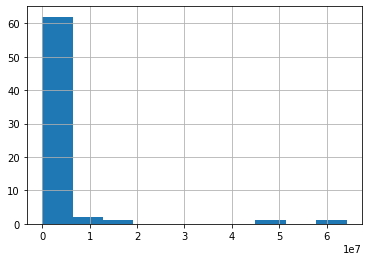

--------------------
Enrolment in tertiary education, all programmes, both sexes (number)
moy:
 2410269.809975239
med:
 427441.0
mod:
 0         538.0
1       13068.0
2       19097.0
3       34771.3
4       41621.0
        ...    
58    6423455.0
59    7541112.0
60   19972624.0
61   28175136.0
62   34091288.0
Length: 63, dtype: float64


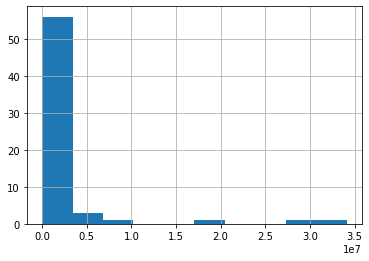

--------------------
Enrolment in upper secondary general, both sexes (number)
moy:
 2200976.904326923
med:
 307657.0
mod:
 0         842.0
1         952.0
2        9797.0
3       15191.0
4       22925.0
        ...    
60    5593270.0
61    9139433.0
62   11646415.0
63   24822886.0
64   53727224.0
Length: 65, dtype: float64


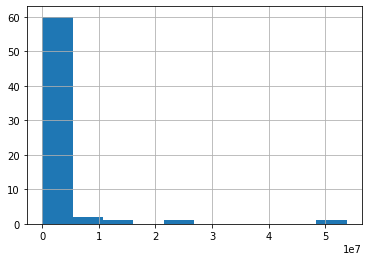

--------------------
GDP per capita (constant 2005 US$)
moy:
 23447.774912348334
med:
 13570.3069956867
mod:
 0       514.9
1       640.9
2      1008.0
3      1305.7
4      1522.5
       ...   
61    53798.4
62    58788.1
63    75499.7
64    88538.7
65   103721.7
Length: 66, dtype: float64


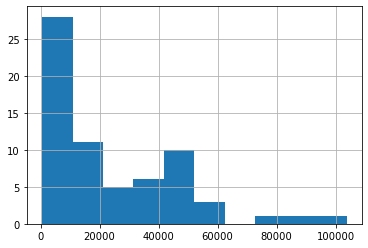

--------------------
Government expenditure on education as % of GDP (%)
moy:
 5.118228281628002
med:
 4.95539999008179
mod:
 0    1.3
1    2.5
2    2.8
3    3.3
4    3.4
5    3.4
6    3.6
7    3.7
8    3.8
9    4.1
10   4.1
11   4.1
12   4.1
13   4.2
14   4.2
15   4.3
16   4.6
17   4.6
18   4.7
19   4.7
20   4.7
21   4.8
22   4.8
23   4.9
24   4.9
25   4.9
26   4.9
27   5.0
28   5.0
29   5.0
30   5.1
31   5.3
32   5.3
33   5.3
34   5.4
35   5.5
36   5.5
37   5.6
38   5.6
39   5.6
40   5.7
41   5.8
42   6.0
43   6.0
44   6.1
45   6.6
46   6.7
47   6.9
48   7.0
49   7.2
50   7.3
51   7.4
52   7.7
53   7.8
54   8.6
dtype: float64


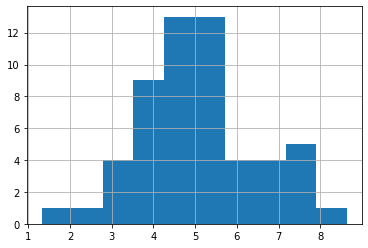

--------------------
Internet users (per 100 people)
moy:
 59.950071092089566
med:
 62.0956
mod:
 0     4.5
1     9.0
2    12.0
3    13.1
4    14.9
     ... 
62   94.0
63   94.6
64   94.8
65   95.1
66   96.5
Length: 67, dtype: float64


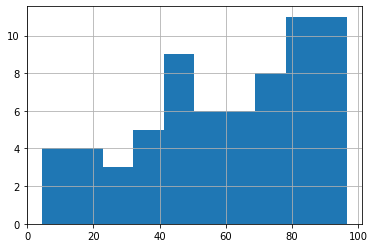

In [88]:
# Représentation graphique (histogramme) sur nos variables
for var in final_set['Indicator Name'].unique():
    subset = final_set.loc[final_set['Indicator Name'] == var, :]
    print("-"*20)
    print(var)
    print("moy:\n",subset['2013'].mean())
    print("med:\n",subset['2013'].median())
    print("mod:\n",subset['2013'].mode())
    subset["2013"].hist() # Crée l'histogramme
    plt.show()

Plusieurs choses sautent aux yeux à travers ces premiers histogrames.
Tout d'abord, les premiers semblent très inclinés à gauche, dû à la présence de quelques outliers très à droite.

--------------------
Enrolment in lower secondary general, both sexes (number)
moy:
 3355672.843283582
med:
 475291.0
mod:
 0        1711.0
1        3079.0
2       12978.0
3       21847.0
4       36525.0
        ...    
62   12449044.0
63   12539705.0
64   14867060.0
65   48361184.0
66   64171856.0
Length: 67, dtype: float64


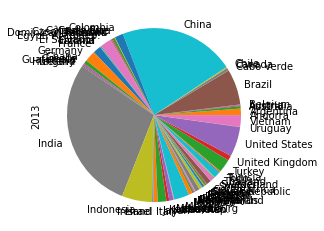

--------------------
Enrolment in tertiary education, all programmes, both sexes (number)
moy:
 2410269.809975239
med:
 427441.0
mod:
 0         538.0
1       13068.0
2       19097.0
3       34771.3
4       41621.0
        ...    
58    6423455.0
59    7541112.0
60   19972624.0
61   28175136.0
62   34091288.0
Length: 63, dtype: float64


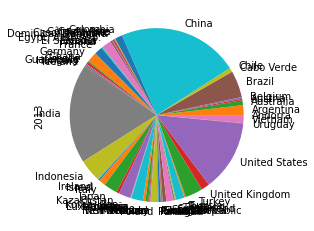

--------------------
Enrolment in upper secondary general, both sexes (number)
moy:
 2200976.904326923
med:
 307657.0
mod:
 0         842.0
1         952.0
2        9797.0
3       15191.0
4       22925.0
        ...    
60    5593270.0
61    9139433.0
62   11646415.0
63   24822886.0
64   53727224.0
Length: 65, dtype: float64


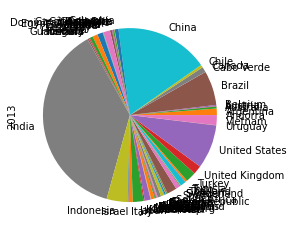

--------------------
GDP per capita (constant 2005 US$)
moy:
 23447.774912348334
med:
 13570.3069956867
mod:
 0       514.9
1       640.9
2      1008.0
3      1305.7
4      1522.5
       ...   
61    53798.4
62    58788.1
63    75499.7
64    88538.7
65   103721.7
Length: 66, dtype: float64


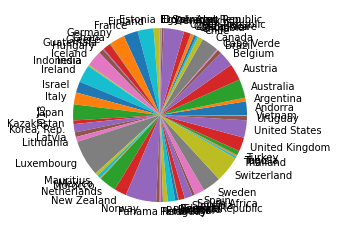

--------------------
Government expenditure on education as % of GDP (%)
moy:
 5.118228281628002
med:
 4.95539999008179
mod:
 0    1.3
1    2.5
2    2.8
3    3.3
4    3.4
5    3.4
6    3.6
7    3.7
8    3.8
9    4.1
10   4.1
11   4.1
12   4.1
13   4.2
14   4.2
15   4.3
16   4.6
17   4.6
18   4.7
19   4.7
20   4.7
21   4.8
22   4.8
23   4.9
24   4.9
25   4.9
26   4.9
27   5.0
28   5.0
29   5.0
30   5.1
31   5.3
32   5.3
33   5.3
34   5.4
35   5.5
36   5.5
37   5.6
38   5.6
39   5.6
40   5.7
41   5.8
42   6.0
43   6.0
44   6.1
45   6.6
46   6.7
47   6.9
48   7.0
49   7.2
50   7.3
51   7.4
52   7.7
53   7.8
54   8.6
dtype: float64


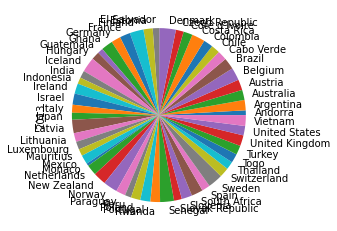

--------------------
Internet users (per 100 people)
moy:
 59.950071092089566
med:
 62.0956
mod:
 0     4.5
1     9.0
2    12.0
3    13.1
4    14.9
     ... 
62   94.0
63   94.6
64   94.8
65   95.1
66   96.5
Length: 67, dtype: float64


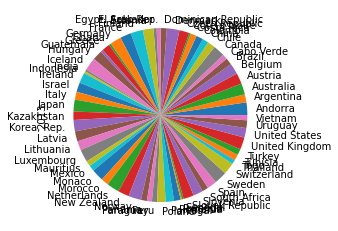

In [89]:
# Testons cela sur un diagramme en secteurs
# Diagramme en secteurs

for var in final_set['Indicator Name'].unique():
    subset = final_set.loc[final_set['Indicator Name'] == var, :] # création d'un sous échantillon sur lequel 
    print("-"*20)
    print(var)
    print("moy:\n",subset['2013'].mean())
    print("med:\n",subset['2013'].median())
    print("mod:\n",subset['2013'].mode())
    subset["2013"].plot(kind='pie') # Crée un camembert
    plt.show()

En effet, c'est la présence des USA, Chine et Inde qui pose problème pour nos histogrammes. Une solution est d'augmenter le nombre de corbeilles.

--------------------
Enrolment in lower secondary general, both sexes (number)
moy:
 3355672.843283582
med:
 475291.0
mod:
 0        1711.0
1        3079.0
2       12978.0
3       21847.0
4       36525.0
        ...    
62   12449044.0
63   12539705.0
64   14867060.0
65   48361184.0
66   64171856.0
Length: 67, dtype: float64


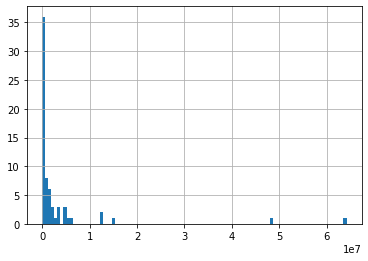

--------------------
Enrolment in tertiary education, all programmes, both sexes (number)
moy:
 2410269.809975239
med:
 427441.0
mod:
 0         538.0
1       13068.0
2       19097.0
3       34771.3
4       41621.0
        ...    
58    6423455.0
59    7541112.0
60   19972624.0
61   28175136.0
62   34091288.0
Length: 63, dtype: float64


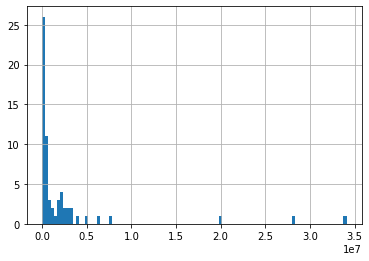

--------------------
Enrolment in upper secondary general, both sexes (number)
moy:
 2200976.904326923
med:
 307657.0
mod:
 0         842.0
1         952.0
2        9797.0
3       15191.0
4       22925.0
        ...    
60    5593270.0
61    9139433.0
62   11646415.0
63   24822886.0
64   53727224.0
Length: 65, dtype: float64


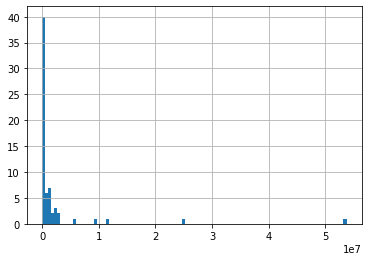

--------------------
GDP per capita (constant 2005 US$)
moy:
 23447.774912348334
med:
 13570.3069956867
mod:
 0       514.9
1       640.9
2      1008.0
3      1305.7
4      1522.5
       ...   
61    53798.4
62    58788.1
63    75499.7
64    88538.7
65   103721.7
Length: 66, dtype: float64


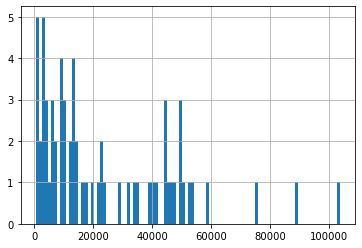

--------------------
Government expenditure on education as % of GDP (%)
moy:
 5.118228281628002
med:
 4.95539999008179
mod:
 0    1.3
1    2.5
2    2.8
3    3.3
4    3.4
5    3.4
6    3.6
7    3.7
8    3.8
9    4.1
10   4.1
11   4.1
12   4.1
13   4.2
14   4.2
15   4.3
16   4.6
17   4.6
18   4.7
19   4.7
20   4.7
21   4.8
22   4.8
23   4.9
24   4.9
25   4.9
26   4.9
27   5.0
28   5.0
29   5.0
30   5.1
31   5.3
32   5.3
33   5.3
34   5.4
35   5.5
36   5.5
37   5.6
38   5.6
39   5.6
40   5.7
41   5.8
42   6.0
43   6.0
44   6.1
45   6.6
46   6.7
47   6.9
48   7.0
49   7.2
50   7.3
51   7.4
52   7.7
53   7.8
54   8.6
dtype: float64


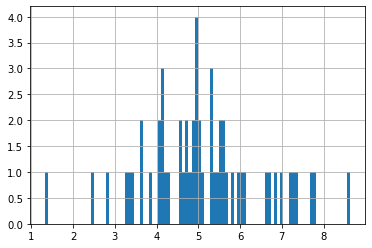

--------------------
Internet users (per 100 people)
moy:
 59.950071092089566
med:
 62.0956
mod:
 0     4.5
1     9.0
2    12.0
3    13.1
4    14.9
     ... 
62   94.0
63   94.6
64   94.8
65   95.1
66   96.5
Length: 67, dtype: float64


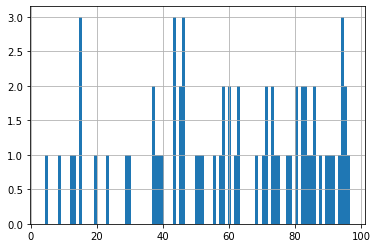

In [90]:
# Augmentation du nombre de bins
for var in final_set['Indicator Name'].unique():
    subset = final_set.loc[final_set['Indicator Name'] == var, :]
    print("-"*20)
    print(var)
    print("moy:\n",subset['2013'].mean())
    print("med:\n",subset['2013'].median())
    print("mod:\n",subset['2013'].mode())
    subset["2013"].hist(bins=100) # Crée l'histogramme
    plt.show()

Les histogrammes nous informent sur plusieurs points importants.

Premièrement, la population des pays étant très variable, il est normal que le nombre d'élèves scolarisés soit lui aussi très variable. 
Avec plus de 64 et 48 millions d'étudiants en inscrits 'Lower secondary', l'Inde et la Chine comptabilisent à deux la moitié des collégiens du monde. Ce constat est même plus important pour les lycéens avec respectivement 53 et 24 millions, soit 77 millions de lycéens sur les 143 millions mondiaux. Concernant la 'Tertiary education', l'écart est moins important avec d'autres grands pays comme les USA mais le chiffre reste écrasant. Ces "énormes" pays détiennent un nombre total d'étudiants tellement grand qu'il est raisonnable de penser qu'une base de clients elle-aussi très importante peut exister, même si le PIB/habitant est faible; les 2 ou 3 déciles les plus riches de ces pays étant peut-être au niveau d'un pays de l'OCDE. Il nous manquera une statistique de répartition des richesses par habitants pour véritablement trancher.
Je vais donc conserver l'Inde, la Chine et le Brésil, même si le PIB/habitant est inférieur au seuil que nous choisirons.

A l'inverse, dois-je donc éliminer tous les pays présentant un nombre de clients potentiels relativement faible par rapport aux pays plus peuplés qui ont donc une base potentielle bien plus importante? Pour y répondre, on s'appuyerra sur un double indicateur: si le pays est faiblement peuplé et aussi relativement pauvre en terme de PIB/habitant, la réponse est oui. Mais un nombre faible d'habitant couplé à un PIB/habitant faible sera à éliminer.

Deuxièmement, il y a en effet une très grande disparité de richesse entre nos pays.
La majorité des pays présentent un PIB par habitant annuel inférieur à 20000 USD (de 2005). Nous allons fixer un seuil minimal en dessous duquel les pays vont être éliminés excepté pour les trois grands pays cités plus haut.

Troisièmement, on observe une distribution normale des dépenses d'éducation par pays. C'est tout à fait normal puisqu'il s'agit cette fois-ci d'un indicateur normalisé (puisque exprimé en % du PIB). Rien ne saute aux yeux, nous verrons s'il est possible d'entirer quelque chose plus loin dans notre analyse.

Enfin, à l'image du PIB/habitant, il y a un assez grande disparité en terme de connectivité (représenté par le nombre d'utilisateurs d'internets pour 100 habitants). On fixera également un seuil en dessous duquel les pays seront éliminés. Encore une fois, l'Inde, la Chine et le Brésil seront des exceptions. En effet, même si le tableau ci-dessous nous montre que seulement 15% de la population indienne utilise internet en 2013, il est acceptable de penser qu'il s'agit des 15% les plus aisés. Si l'on sélectionne donc seulement 15% des étudiants indiens du secondaire et du tertiaire, nous obtenons 21 millions d'élèves (sans prendre en compte le phénomène mondial de prédominance de l'utilisation d'internet chez les jeunes) ce qui représente à peu près trois fois le nombre total d'élèves français inscrits au secondaire et tertiaire.

In [91]:
final_set.loc[['India', 'China', 'United States', 'Brazil']]

,Indicator Name,2002,2013,Currency Unit,Region
Country Name,,,,,
India,"Enrolment in lower secondary general, both sex...",44828236.0,64171856.0,Indian rupee,South Asia
India,"Enrolment in tertiary education, all programme...",10576653.0,28175136.0,Indian rupee,South Asia
India,"Enrolment in upper secondary general, both sex...",30768148.0,53727224.0,Indian rupee,South Asia
India,GDP per capita (constant 2005 US$),801.5,1550.1,Indian rupee,South Asia
India,Government expenditure on education as % of GD...,NaN,3.8,Indian rupee,South Asia
India,Internet users (per 100 people),1.5,15.1,Indian rupee,South Asia
China,"Enrolment in lower secondary general, both sex...",65405344.0,48361184.0,Chinese yuan,East Asia & Pacific
China,"Enrolment in tertiary education, all programme...",12143723.0,34091288.0,Chinese yuan,East Asia & Pacific
China,"Enrolment in upper secondary general, both sex...",17173322.0,24822886.0,Chinese yuan,East Asia & Pacific


Voyons maintenant quelques statistiques par Région

In [92]:
# Statistiques par Région
print(final_set.groupby(['Indicator Name', 'Region'])['2013'].mean())

Indicator Name                                                        Region                    
Enrolment in lower secondary general, both sexes (number)             East Asia & Pacific           9370215.6
                                                                      Europe & Central Asia          870181.5
                                                                      Latin America & Caribbean     2472702.3
                                                                      Middle East & North Africa    1757300.8
                                                                      North America                 6807579.0
                                                                      South Asia                   64171856.0
                                                                      Sub-Saharan Africa             741422.7
Enrolment in tertiary education, all programmes, both sexes (number)  East Asia & Pacific           6752747.7
                       

On remarque que certaines zones ont un PIB par habitant très faible comme 'Latin America & Caribbean', 'Sub-Saharan Africa' ou encore 'South Asia". Comme expliqué ci-dessus, nous ne garderons que les pays les plus peuplés de ces régions, voire ceux présentant un taux de croissance très prometteur.

In [93]:
# Définition des seuils

# PIB
gdp_mean_2013 = final_set.loc[final_set['Indicator Name'] == 'GDP per capita (constant 2005 US$)']['2013'].mean()
gdp_std_2013 = final_set.loc[final_set['Indicator Name'] == 'GDP per capita (constant 2005 US$)']['2013'].std(ddof=0)
print(gdp_mean_2013, gdp_std_2013)

23447.774912348334 22719.659589088464


In [94]:
# Nous choisirons en guise seuil plancher la valeur pour la France moins une standard déviation
gdp = final_set.loc[final_set['Indicator Name'] == 'GDP per capita (constant 2005 US$)', '2013']
gdp_min = gdp['France'] - gdp_std_2013
print(gdp_min)

18529.791694420936


In [95]:
# Filtrage du set avec cette valeur minimum (n'oublions pas de garder Chine, Inde et Brésil) 

## Méthode 1
m1 = final_set['Indicator Name'].eq('GDP per capita (constant 2005 US$)')
m2 = final_set['2013'] >= gdp_min
countries = list(final_set.index[m1 & m2])+['China', 'India', 'Brazil']
gdp_set = final_set[final_set.index.isin(countries)]

## Méthode 2
#gdp_set = final_set.loc[list(
#    {'China', 'India', 'Brazil'} | 
#    set(final_set[((final_set['Indicator Name'] == 'GDP per capita (constant 2005 US$)') & 
#        (final_set['2013'] >= gdp_min))].index)
#    )]

## Méthode 3
# Country name set.
#countries_gdp = {"China", "India", "Brazil"}
# Create string expression to evaluate on DataFrame.
# Note: Backticks should be used for non-standard pandas field names 
# (including names that begin with a numerical value.
#expression = f"(`Indicator Name` == 'GDP per capita (constant 2005 US$)' & `2013` >= {gdp_min})"
# Add each country name as 'or' clause for second part of expression.
#expression += "or (" + " or ".join([f"`Country Name` == '{n}'" for n in countries_gdp]) + ")"

# Collect resulting DataFrame to new variable.
#gdp_set = final_set.query(expression)


print(gdp_set.index.unique())

Index(['Andorra', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'China', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea, Rep.', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'],
      dtype='object', name='Country Name')


In [96]:
# Liste des pays filtrés par PIB
gdp_filtered_countries = gdp_set.index.unique()
gdp_droped_countries = gdp_filtered_countries.symmetric_difference(full_pays)
gdp_droped_countries

Index(['Argentina', 'Cabo Verde', 'Chile', 'Colombia', 'Costa Rica',
       'Cote d'Ivoire', 'Dominican Republic', 'Egypt, Arab Rep.',
       'El Salvador', 'Estonia', 'Ghana', 'Guatemala', 'Hungary', 'Indonesia',
       'Kazakhstan', 'Latvia', 'Lithuania', 'Mauritius', 'Mexico', 'Monaco',
       'Morocco', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Romania', 'Rwanda',
       'Senegal', 'Slovak Republic', 'South Africa', 'Thailand', 'Togo',
       'Tunisia', 'Turkey', 'Uruguay', 'Vietnam'],
      dtype='object', name='Country Name')

Monaco a une valeur manquante au PIB/habitant. C'est pourquoi il a été éliminé, mais nous allons le rajouter à nouveau.
Tous les autres pays ont un PIB inférieur à notre seuil plancher. 

In [97]:
m1 = final_set['Indicator Name'].eq('GDP per capita (constant 2005 US$)')
m2 = final_set['2013'] >= gdp_min
countries = list(final_set.index[m1 & m2])+['China', 'India', 'Brazil', 'Monaco']
gdp_set = final_set[final_set.index.isin(countries)]

print(gdp_set.index.unique())

Index(['Andorra', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'China', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea, Rep.', 'Luxembourg', 'Monaco', 'Netherlands', 'New Zealand',
       'Norway', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'],
      dtype='object', name='Country Name')


Suite à ce premier filtrage par PIB, la liste de pays restants n'a pas à être réduite davantage. Tous ces pays peuvent potentiellement être des cibles à long terme.
Il s'agit maintenant d'établir un classement afin de déterminer lesquelles notre entreprise doit cibler en priorité.

Pour ce faire, nous allons combiner tous les indicateurs.

In [98]:
# Combinaison de la base d'étudiants
gdp_set.head(10)

,Indicator Name,2002,2013,Currency Unit,Region
Country Name,,,,,
Andorra,"Enrolment in lower secondary general, both sex...",2327.0,3079.0,Euro,Europe & Central Asia
Andorra,"Enrolment in tertiary education, all programme...",267.0,538.0,Euro,Europe & Central Asia
Andorra,"Enrolment in upper secondary general, both sex...",590.0,842.0,Euro,Europe & Central Asia
Andorra,GDP per capita (constant 2005 US$),42396.3,39104.3,Euro,Europe & Central Asia
Andorra,Government expenditure on education as % of GD...,1.7,2.5,Euro,Europe & Central Asia
Andorra,Internet users (per 100 people),11.3,94.0,Euro,Europe & Central Asia
Australia,"Enrolment in lower secondary general, both sex...",960006.0,1029941.0,Australian dollar,East Asia & Pacific
Australia,"Enrolment in tertiary education, all programme...",1012210.0,1390478.0,Australian dollar,East Asia & Pacific
Australia,"Enrolment in upper secondary general, both sex...",451606.0,536146.0,Australian dollar,East Asia & Pacific


In [99]:
# Number of students in Upper Secondary and Tertiary Education
gdp_students = gdp_set.loc[gdp_set['Indicator Name'].isin(['Enrolment in upper secondary general, both sexes (number)', 'Enrolment in tertiary education, all programmes, both sexes (number)']), '2013']
gdp_students = gdp_students.groupby('Country Name').sum()
gdp_students.sort_values(ascending=False)

Country Name
India            81902360.0
China            58914174.0
United States    31619039.0
Brazil           16680545.0
Japan             6698446.0
Korea, Rep.       4908988.0
United Kingdom    4701616.0
Germany           4132021.0
France            3810045.0
Spain             3055199.0
Italy             3000586.0
Australia         1926624.0
Canada            1411914.0
Netherlands       1037312.0
Greece             905364.0
Belgium            796145.0
Sweden             711540.0
Israel             587831.0
Portugal           586929.0
Czech Republic     541904.0
Austria            533066.8
Denmark            467671.0
New Zealand        423128.3
Finland            416421.0
Switzerland        398822.0
Norway             376710.0
Ireland            199428.0
Slovenia           129459.0
Luxembourg          44568.3
Iceland             34288.0
Andorra              1380.0
Monaco                952.0
Name: 2013, dtype: float64

Et nous trions également par connectivité

In [100]:
# Nombre d'utilisateurs d'internet pour 100 habitants
net_usr = gdp_set.loc[gdp_set['Indicator Name'] == 'Internet users (per 100 people)']['2013']
net_usr.sort_values(ascending=False)

Country Name
Iceland          96.5
Norway           95.1
Sweden           94.8
Denmark          94.6
Andorra          94.0
Netherlands      94.0
Luxembourg       93.8
Finland          91.5
Monaco           90.7
United Kingdom   89.8
Japan            88.2
Switzerland      86.3
Canada           85.8
Korea, Rep.      84.8
Germany          84.2
Australia        83.5
New Zealand      82.8
Belgium          82.2
France           81.9
Austria          80.6
Ireland          78.2
Czech Republic   74.1
Slovenia         72.7
Spain            71.6
United States    71.4
Israel           70.3
Portugal         62.1
Greece           59.9
Italy            58.5
Brazil           51.0
China            45.8
India            15.1
Name: 2013, dtype: float64

Nous pouvons également trier par dépenses gouvernementales annuelles dans l'éducation. Cela peut indiquer un environnement favorable au financement de formations par l'Etat.

In [101]:
# Dépenses publiques (en % du PIB) dans l'éducation
educ_expenditures = gdp_set.loc[gdp_set['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']['2013']
educ_expenditures.sort_values(ascending= False)

Country Name
Denmark          8.6
Iceland          7.8
Sweden           7.7
Norway           7.4
Finland          7.2
New Zealand      6.7
Belgium          6.6
Brazil           6.0
Israel           5.8
United Kingdom   5.6
Netherlands      5.6
Austria          5.6
France           5.5
Slovenia         5.5
Ireland          5.3
Portugal         5.3
Australia        5.3
Switzerland      5.1
United States    4.9
Germany          4.9
Spain            4.3
Italy            4.2
Luxembourg       4.1
Czech Republic   4.1
India            3.8
Japan            3.7
Andorra          2.5
Monaco           1.3
Canada           NaN
China            NaN
Greece           NaN
Korea, Rep.      NaN
Name: 2013, dtype: float64

Aussi, nous pouvons favoriser les pays faisant partie de la zone Euro, et de ce fait de l'UE, puisqu'il sera à fortiori plus aisé de se lancer sur ces marchés.

In [102]:
# Zone euro
euro_zone = gdp_set.loc[gdp_set['Currency Unit'] == 'Euro']['Currency Unit']
euro_zone = euro_zone.groupby('Country Name').unique()
print(euro_zone)

Country Name
Andorra        [Euro]
Austria        [Euro]
Belgium        [Euro]
Finland        [Euro]
France         [Euro]
Germany        [Euro]
Greece         [Euro]
Ireland        [Euro]
Italy          [Euro]
Luxembourg     [Euro]
Monaco         [Euro]
Netherlands    [Euro]
Portugal       [Euro]
Slovenia       [Euro]
Spain          [Euro]
Name: Currency Unit, dtype: object


Nous allons maintenant créer un indicateur synthétisant ces statistiques

<AxesSubplot:>

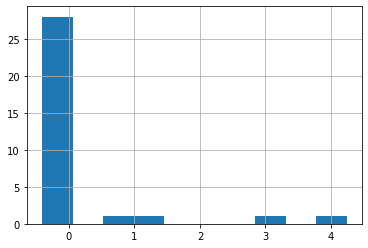

In [103]:
## Indicateur "Potentiel clients"
# On normalise d'abord les variables 
import scipy.stats as stats

# Nb étudiants
students_zscore = stats.zscore(gdp_students)
students_zscore.hist()

<AxesSubplot:>

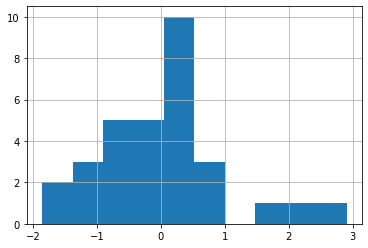

In [104]:
# GDP per cap
gdp1 = gdp_set.loc[gdp_set['Indicator Name'] == 'GDP per capita (constant 2005 US$)']['2013']
gdp_zscore  = stats.zscore(gdp1, nan_policy='omit')
gdp_zscore.hist()

<AxesSubplot:>

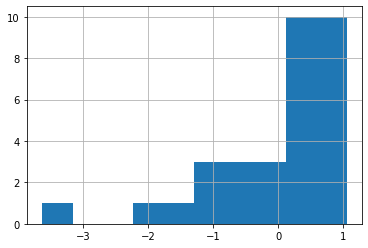

In [105]:
# Internet users
net_users = gdp_set.loc[gdp_set['Indicator Name'] == 'Internet users (per 100 people)']['2013']
net_zscore = stats.zscore(net_users, nan_policy = 'omit')
net_zscore.hist()

<AxesSubplot:>

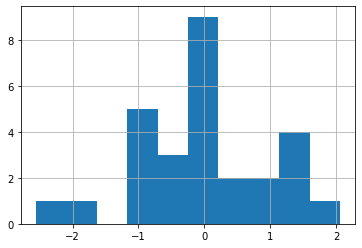

In [106]:
# Dépenses publiques dans l'éducation
educ_exp = gdp_set.loc[gdp_set['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']['2013']
educ_zscore = stats.zscore(educ_exp, nan_policy = 'omit')
educ_zscore.hist()

Nous allons maintenant combiner ces différents z_score à des coefficients propres à chaque variable, puis regarder le classement final.


In [107]:
# Coefficients

students_coef = 4
net_usr_coef = 3
gdp_coef = 1
educ_exp_coef = 1

Les indicateurs les plus important dans notre classement sont le nombre de clients potentiels dans chaque pays, ainsi que le niveau de connectivité de ces derniers. Vient ensuite la richesse par habitant, puis enfin les dépenses publiques d'éducation. 

In [108]:
# Conversion des series 'z_score' en dataframe

students_zscore_df = students_zscore.to_frame()
gdp_zscore_df = gdp_zscore.to_frame()
net_zscore_df = net_zscore.to_frame()
educ_zscore_df = educ_zscore.to_frame()

In [109]:
# Création de la table de zscore
zscore_table = students_zscore_df.merge(gdp_zscore_df.merge(net_zscore_df.merge(educ_zscore_df,on = 'Country Name'), on = 'Country Name'),on = 'Country Name')
zscore_table.columns.values[0] = 'Students number' 
zscore_table.columns.values[1] = 'GDP per capita' 
zscore_table.columns.values[2] = 'Internet users' 
zscore_table.columns.values[3] = 'Educ gov. expenditure'
zscore_table

C:\Users\Gregoire\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2013_y'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,Students number,GDP per capita,Internet users,Educ gov. expenditure
Country Name,,,,
Andorra,-0.4,-0.1,0.9,-1.8
Australia,-0.3,0.6,0.3,-0.1
Austria,-0.4,0.3,0.1,0.1
Belgium,-0.4,0.1,0.2,0.8
Brazil,0.5,-1.4,-1.6,0.4
Canada,-0.3,0.4,0.4,NaN
China,2.9,-1.7,-1.9,NaN
Czech Republic,-0.4,-1.0,-0.2,-0.8
Denmark,-0.4,0.8,0.9,2.1


In [110]:
# Calcul du score
zscore_table['Score'] = zscore_table.apply(lambda x: x['Students number']*students_coef +
                                                     x['GDP per capita']*gdp_coef +
                                                     x['Internet users']*net_usr_coef +
                                                     x['Educ gov. expenditure']*educ_exp_coef
                                                     , axis = 1)

In [111]:
zscore_table.sort_values(by=['Score'], ascending = False)

,Students number,GDP per capita,Internet users,Educ gov. expenditure,Score
Country Name,,,,,
Norway,-0.4,2.2,1.0,1.3,4.8
United States,1.4,0.4,-0.4,-0.3,4.5
Denmark,-0.4,0.8,0.9,2.1,4.2
Sweden,-0.4,0.5,0.9,1.5,3.4
India,4.2,-1.9,-3.6,-1.0,3.2
Iceland,-0.4,0.1,1.0,1.5,3.2
Luxembourg,-0.4,2.9,0.9,-0.8,3.1
Finland,-0.4,0.2,0.8,1.1,2.1
Netherlands,-0.4,0.4,0.9,0.1,1.8


Afin de tout à fait finaliser le classement, nous devons traiter ces quelques NaN qui empêchent certains pays d'y apparaître. Pour ce faire, nous allons poser des hypothèses sans les vérifier, ou chercher les données à la main.
Le Canada dépense en 2011 5.3% du PIB dans l'éducation (même source de données). La Chine, 3,9% pour 2013 (même source de données mais publication plus récente). Plus compliqué pour la Grèce car les données sont très éparses (4% en 2005, 3.7% en 2015); nous fixons 3.8%. Nous retiendrons 4.3% pour la Corée. Enfin, nous avons 1.3% pour Monaco en 2013 (donnée mise à jour).
De même, des données plus récentes nous donnent 150972 (US$ de 2015) pour l'année 2013. 
NB: toutes ces données proviennent de la même source (Banque Mondiale) mais ont été mises à jour plus récemment.

In [112]:
## Remplissae des derniers NaN

# GDP per cap
gdp1.loc['Monaco'] = 150972
gdp_zscore  = stats.zscore(gdp1, nan_policy='omit')

# Gov expenditure in education
educ_exp.loc['Canada'] = 5.3
educ_exp.loc['China'] = 3.9
educ_exp.loc['Greece'] = 3.8
educ_exp.loc['Korea, Rep.'] = 4.3
educ_exp.loc['Monaco'] = 1.3
educ_zscore = stats.zscore(educ_exp, nan_policy = 'omit')

C:\Users\Gregoire\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Gregoire\anaconda3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [113]:
# Recalcul du tableau et du score final
students_zscore_df = students_zscore.to_frame()
gdp_zscore_df = gdp_zscore.to_frame()
net_zscore_df = net_zscore.to_frame()
educ_zscore_df = educ_zscore.to_frame()

zscore_table = students_zscore_df.merge(gdp_zscore_df.merge(net_zscore_df.merge(educ_zscore_df,on = 'Country Name'), on = 'Country Name'),on = 'Country Name')
zscore_table.columns.values[0] = 'Students number' 
zscore_table.columns.values[1] = 'GDP per capita' 
zscore_table.columns.values[2] = 'Internet users' 
zscore_table.columns.values[3] = 'Educ gov. expenditure'

zscore_table['Score'] = zscore_table.apply(lambda x: x['Students number']*students_coef +
                                                     x['GDP per capita']*gdp_coef +
                                                     x['Internet users']*net_usr_coef +
                                                     x['Educ gov. expenditure']*educ_exp_coef
                                                     , axis = 1)
zscore_table.sort_values(by=['Score'], ascending = False)

C:\Users\Gregoire\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2013_y'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,Students number,GDP per capita,Internet users,Educ gov. expenditure,Score
Country Name,,,,,
United States,1.4,0.2,-0.4,-0.2,4.3
Norway,-0.4,1.5,1.0,1.4,4.3
Denmark,-0.4,0.5,0.9,2.2,4.0
China,2.9,-1.4,-1.9,-0.9,3.9
India,4.2,-1.5,-3.6,-0.9,3.6
Sweden,-0.4,0.3,0.9,1.6,3.3
Iceland,-0.4,-0.0,1.0,1.7,3.2
Luxembourg,-0.4,2.1,0.9,-0.7,2.4
Finland,-0.4,0.0,0.8,1.3,2.0


Enfin, les pays faisant partie de la zone Euro, et/ou les pays francophones se voient attribués respectivement 0.5 et 1 points supplémentaires, traduisant la relative facilité à s'implanter dans ce pays-ci. En effet, il est plus aisé d'ouvrir une entreprise dans l'Union Européenne puisque l'environnement légal y est harmonisé. D'autre part, étant une entreprise française, notre site et notre contenu sont pour le moment uniquement en français. Nous sommes donc parfaitement prêt niveau contenu pour les pays francophones, alors que nous aurons besoin d'entièrement traduire le site et les cours pour les pays étrangers.

In [114]:
gdp_set['UE'] = gdp_set['Currency Unit'].apply(lambda x: 1 if x == 'Euro' else 0 )

C:\Users\Gregoire\AppData\Local\Temp/ipykernel_7332/1608363653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_set['UE'] = gdp_set['Currency Unit'].apply(lambda x: 1 if x == 'Euro' else 0 )


In [115]:
# Ajout d'une colonne UE
EU = gdp_set['UE']
EU_df = pd.DataFrame(EU)
zscore_table = zscore_table.merge(EU_df, on = 'Country Name', how='left')

In [116]:
zscore_table = zscore_table.drop_duplicates()

In [117]:
# On ajoute la Suède, l'Islande, la République Tchèque et le Danemark qui sont dans l'UE mais pas dans la zone euro
zscore_table.loc['Iceland', 'UE'] = 1
zscore_table.loc['Sweden', 'UE'] = 1
zscore_table.loc['Czech Republic', 'UE'] = 1
zscore_table.loc['Denmark', 'UE'] = 1

In [118]:
# Ajout d'une colonne Francophone
pays_fr = ['France', 'Belgium', 'Luxembourg', 'Monaco', 'Switzerland', 'Andorra']
zscore_table.loc[pays_fr, 'Francophone'] = 1
zscore_table['Francophone'].fillna(0, inplace=True)

In [119]:
# Nouveaux coefficient
students_coef = 4
net_usr_coef = 3
gdp_coef = 1
educ_exp_coef = 1
ue_coef = 0.5
fr_coef = 1

In [120]:
# Score final
zscore_table['Score'] = zscore_table.apply(lambda x: x['Students number']*students_coef +
                                                     x['GDP per capita']*gdp_coef +
                                                     x['Internet users']*net_usr_coef +
                                                     x['Educ gov. expenditure']*educ_exp_coef + 
                                                     x['UE']*ue_coef + 
                                                     x['Francophone']*fr_coef
                                                     , axis = 1, )
zscore_table.sort_values(by=['Score'], ascending = False)

,Students number,GDP per capita,Internet users,Educ gov. expenditure,Score,UE,Francophone
Country Name,,,,,,,
Denmark,-0.4,0.5,0.9,2.2,4.5,1,0.0
United States,1.4,0.2,-0.4,-0.2,4.3,0,0.0
Norway,-0.4,1.5,1.0,1.4,4.3,0,0.0
China,2.9,-1.4,-1.9,-0.9,3.9,0,0.0
Luxembourg,-0.4,2.1,0.9,-0.7,3.9,1,1.0
Sweden,-0.4,0.3,0.9,1.6,3.8,1,0.0
Iceland,-0.4,-0.0,1.0,1.7,3.7,1,0.0
India,4.2,-1.5,-3.6,-0.9,3.6,0,0.0
Monaco,-0.4,3.7,0.7,-2.6,3.2,1,1.0


In [121]:
# Réorganisation du tableau des scores
# Obtention des colonnes pour rapidité de codage
cols = list(zscore_table.columns.values)
cols

['Students number',
 'GDP per capita',
 'Internet users',
 'Educ gov. expenditure',
 'Score',
 'UE',
 'Francophone']

In [122]:
# Réorganisation et tableau final
zscore_table = zscore_table[[
 'Students number',
 'GDP per capita',
 'Internet users',
 'Educ gov. expenditure',
 'UE',
 'Francophone',
 'Score']]

zscore_table.sort_values(by=['Score'], ascending = False)

,Students number,GDP per capita,Internet users,Educ gov. expenditure,UE,Francophone,Score
Country Name,,,,,,,
Denmark,-0.4,0.5,0.9,2.2,1,0.0,4.5
United States,1.4,0.2,-0.4,-0.2,0,0.0,4.3
Norway,-0.4,1.5,1.0,1.4,0,0.0,4.3
China,2.9,-1.4,-1.9,-0.9,0,0.0,3.9
Luxembourg,-0.4,2.1,0.9,-0.7,1,1.0,3.9
Sweden,-0.4,0.3,0.9,1.6,1,0.0,3.8
Iceland,-0.4,-0.0,1.0,1.7,1,0.0,3.7
India,4.2,-1.5,-3.6,-0.9,0,0.0,3.6
Monaco,-0.4,3.7,0.7,-2.6,1,1.0,3.2


In [123]:
# Tableau plus détaillé
pd.options.display.float_format = '{:.3f}'.format

zscore_table.sort_values(by=['Score'], ascending = False)

,Students number,GDP per capita,Internet users,Educ gov. expenditure,UE,Francophone,Score
Country Name,,,,,,,
Denmark,-0.383,0.489,0.937,2.209,1,0.000,4.477
United States,1.384,0.179,-0.396,-0.203,0,0.000,4.326
Norway,-0.388,1.536,0.961,1.391,0,0.000,4.258
China,2.933,-1.378,-1.865,-0.874,0,0.000,3.884
Luxembourg,-0.407,2.070,0.888,-0.736,1,1.000,3.871
Sweden,-0.369,0.276,0.946,1.615,1,0.000,3.752
Iceland,-0.408,-0.026,1.047,1.673,1,0.000,3.657
India,4.237,-1.524,-3.627,-0.912,0,0.000,3.631
Monaco,-0.409,3.733,0.711,-2.570,1,1.000,3.159


Ci-dessus notre classement final

In [138]:
df_score = zscore_table['Score'].sort_values(ascending = False)

In [141]:
df_score

Country Name
Denmark           4.477
United States     4.326
Norway            4.258
China             3.884
Luxembourg        3.871
Sweden            3.752
Iceland           3.657
India             3.631
Monaco            3.159
Finland           2.519
Netherlands       2.199
Switzerland       1.800
Belgium           1.601
United Kingdom    1.502
France            1.386
Japan             0.610
Germany           0.588
Andorra           0.550
Canada            0.169
Australia         0.029
New Zealand      -0.164
Austria          -0.301
Korea, Rep.      -0.770
Ireland          -0.848
Slovenia         -2.702
Spain            -2.758
Israel           -2.950
Brazil           -3.215
Czech Republic   -3.369
Portugal         -4.597
Italy            -4.954
Greece           -5.842
Name: Score, dtype: float64